<a href="https://colab.research.google.com/github/aashrits23/HSBC-Fraud-DetectionModel/blob/main/Fraud_Detection_HSBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, accuracy_score, roc_curve, auc
)
import joblib

In [4]:
file_path = '/content/train_hsbc_df (2).xlsx'
df = pd.read_excel(file_path)


In [23]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,3219,3,2,0,34,0,4,44.26,1
1,0,723,3,2,0,34,0,4,324.50,1
2,0,362,3,2,0,44,0,6,176.32,1
3,0,4040,3,2,0,44,0,6,337.41,1
4,0,969,4,1,0,2,0,14,220.11,1


In [27]:
print("The data : {}".format(df.shape))

The data : (513643, 10)


In [28]:
df.isnull().sum()

,0
step,0
customer,0
age,0
gender,0
zipcodeOri,0
merchant,0
zipMerchant,0
category,0
amount,0
fraud,0


In [30]:
df.dtypes

,0
step,int64
customer,int64
age,int64
gender,int64
zipcodeOri,int64
merchant,int64
zipMerchant,int64
category,int64
amount,float64
fraud,int64


In [31]:
df.describe()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,513643.000000,513643.000000,513643.000000,513643.000000,513643.0,513643.000000,513643.0,513643.000000,513643.000000,513643.000000
mean,94.992629,2040.949765,3.014820,1.451409,0.0,23.869240,0.0,11.066021,37.915481,0.012071
std,51.063474,1185.054097,1.336261,0.503259,0.0,8.588319,0.0,2.818072,111.557455,0.109201
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,52.000000,1019.000000,2.000000,1.000000,0.0,18.000000,0.0,12.000000,13.740000,0.000000
50%,97.000000,2028.000000,3.000000,1.000000,0.0,18.000000,0.0,12.000000,26.920000,0.000000
75%,139.000000,3057.000000,4.000000,2.000000,0.0,30.000000,0.0,12.000000,42.550000,0.000000
max,179.000000,4111.000000,7.000000,3.000000,0.0,49.000000,0.0,14.000000,7665.560000,1.000000


In [35]:
import plotly.graph_objects as go
labels = list(df['fraud'].value_counts().index)
values = list(df['fraud'].value_counts().values)
fig=go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()


In [41]:
import plotly.express as px
amt_category = df.groupby('category')['amount'].mean().reset_index()

In [42]:
fig = px.bar(amt_category, x='category', y='amount')
fig.show()

In [5]:
df = df.applymap(lambda x: x.strip("'").strip() if isinstance(x, str) else x)

<ipython-input-5-3e277570cbd3>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip("'").strip() if isinstance(x, str) else x)


In [6]:
label_encoders = {}
for column in ['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

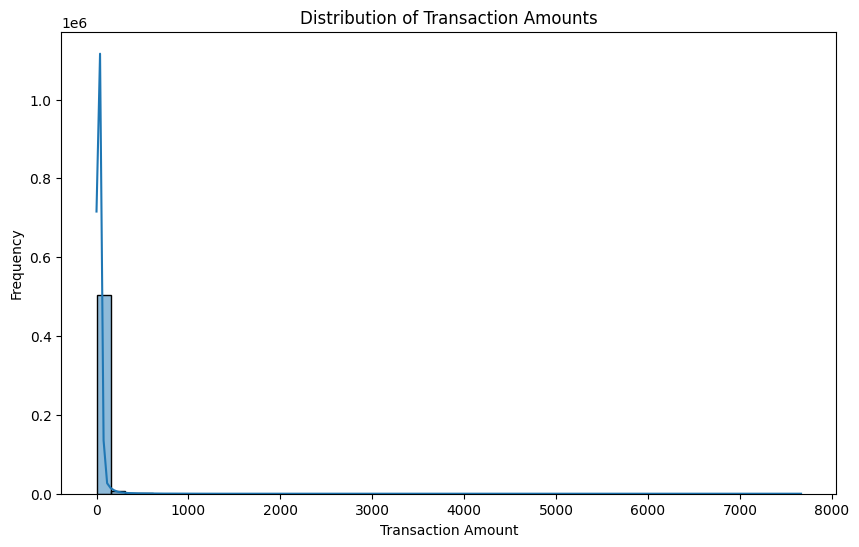

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

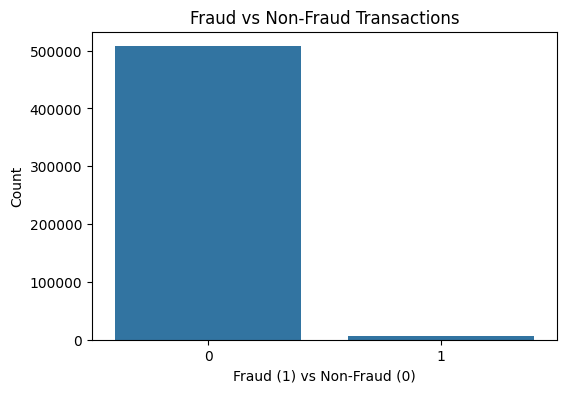

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Count')
plt.show()

In [9]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
df = df.dropna()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

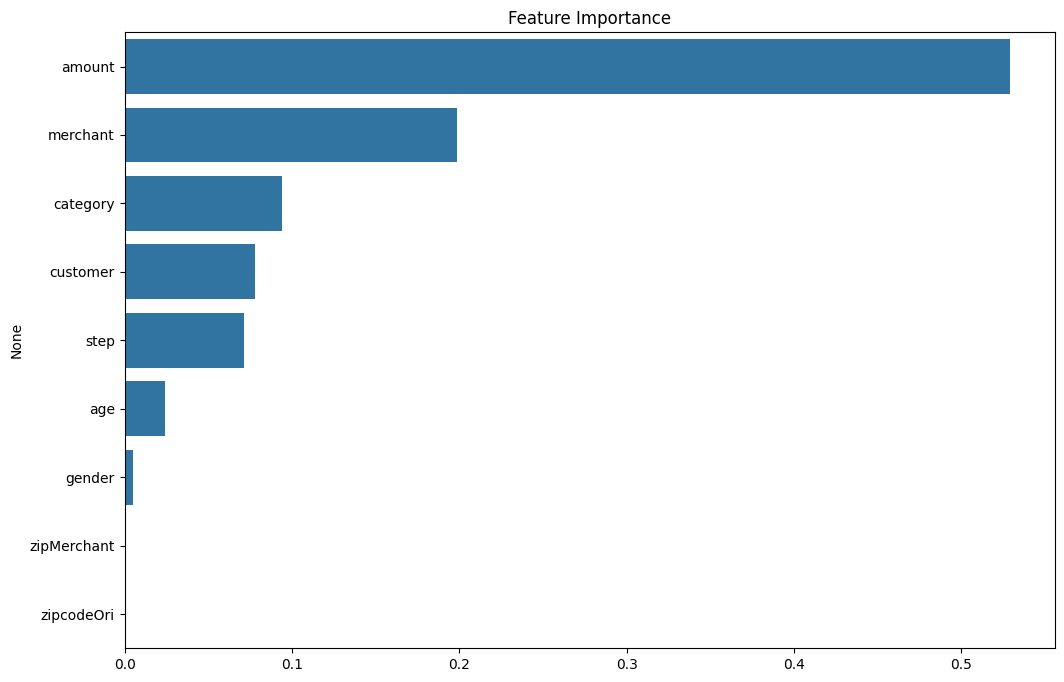

In [13]:

plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.show()


In [14]:
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
from sklearn.ensemble import HistGradientBoostingClassifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [17]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc:.2f}")


Accuracy: 99.58%
Precision: 89.09%
Recall: 74.16%
F1 Score: 80.94%
AUC-ROC: 0.99


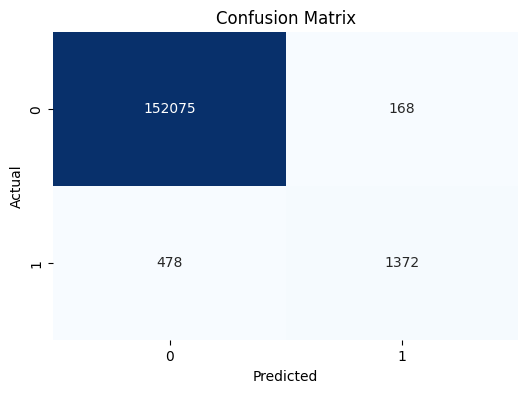

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

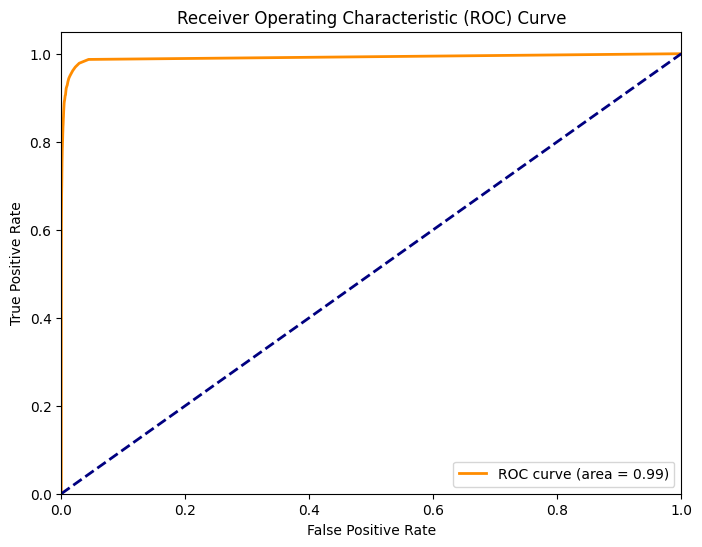

In [19]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
model_filename = 'fraud_detection_model.pkl'
joblib.dump(rf_model, model_filename)
print(f"Model saved to {model_filename}")


Model saved to fraud_detection_model.pkl


In [21]:
# Insights from Data
print("INSIGHTS FROM DATA:")
print("- The majority of transactions are non-fraudulent, leading to an imbalanced dataset.")
print("- The 'amount' feature is highly skewed, with most transactions having smaller amounts.")
print("- Fraudulent transactions are significantly fewer, highlighting the challenge of detecting fraud with minimal false positives.")
print("- Features such as 'merchant', 'zipcode', and 'category' seem to play a critical role in determining fraud.")


INSIGHTS FROM DATA:
- The majority of transactions are non-fraudulent, leading to an imbalanced dataset.
- The 'amount' feature is highly skewed, with most transactions having smaller amounts.
- Fraudulent transactions are significantly fewer, highlighting the challenge of detecting fraud with minimal false positives.
- Features such as 'merchant', 'zipcode', and 'category' seem to play a critical role in determining fraud.
